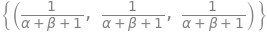

In [1]:
########## Equilibrium Point Finder ###########  
import sympy as sp
from sympy import *

N1, N2, N3 = sp.symbols("N1, N2, N3")  
sp.init_printing()
a, b = sp.symbols('alpha beta')


eqns = [N1 + a*N2 + b*N3 - 1, b*N1 + N2 + a*N3 -1, a*N1 + b*N2 + N3 - 1]
linsolve(eqns, [N1, N2, N3])


In [41]:
######### Jacobian Matrix Calculator ##########

import sympy as sp

sp.init_printing()                       #symbolic printing 

N1, N2, N3 = sp.symbols("N1, N2, N3")                 #define variable as symbols for sympy
alpha, beta = sp.symbols("alpha, beta") #define parameters as symbols for sympy

# Symbolic expression of the system
dN1dt = N1*(1 - N1 - alpha*N2 - beta*N3)
dN2dt = N2*(1 - beta*N1 - N2 - alpha*N3)
dN3dt = N3*(1 - alpha*N1 - beta*N2 - N3)

F = sp.Matrix([dN1dt, dN2dt, dN3dt], dtype = 'float')  #symbolic expression for F(N1, N2, N3)
var = sp.Matrix([N1, N2, N3],dtype='float')      #variables in which compute jacobian 
jac = F.jacobian(var)           #compute jacobian symbolically 

# You can convert jac to a function:
jacobian_fun = sp.lambdify((N1, N2, N3, alpha, beta), jac, dummify=False)

jac

⎡-2⋅N₁ - N₂⋅α - N₃⋅β + 1           -N₁⋅α                    -N₁⋅β         ⎤
⎢                                                                         ⎥
⎢         -N₂⋅β           -N₁⋅β - 2⋅N₂ - N₃⋅α + 1           -N₂⋅α         ⎥
⎢                                                                         ⎥
⎣         -N₃⋅α                    -N₃⋅β           -N₁⋅α - N₂⋅β - 2⋅N₃ + 1⎦

In [51]:
#2 species equilibria

import scipy

J0 = jacobian_fun((1-alpha)/(1-alpha*beta),(1-beta)/(1-alpha*beta),0,alpha,beta)
M = sp.Matrix(J0)


#Obtain eigenvalues of J(0,0,0) symbolically 
lam = sp.symbols('lambda')
cp = sp.det(M - lam * sp.eye(3))
eigs = sp.roots(sp.Poly(cp, lam))

In [52]:
##Jacobian matrix with alpha and beta plugged in
M

⎡  α⋅(1 - β)   2⋅(1 - α)              -α⋅(1 - α)                   -β⋅(1 - α) 
⎢- ───────── - ───────── + 1          ───────────                  ───────────
⎢   -α⋅β + 1    -α⋅β + 1                -α⋅β + 1                     -α⋅β + 1 
⎢                                                                             
⎢        -β⋅(1 - β)             β⋅(1 - α)   2⋅(1 - β)              -α⋅(1 - β) 
⎢        ───────────          - ───────── - ───────── + 1          ───────────
⎢          -α⋅β + 1              -α⋅β + 1    -α⋅β + 1                -α⋅β + 1 
⎢                                                                             
⎢                                                            α⋅(1 - α)   β⋅(1 
⎢             0                            0               - ───────── - ─────
⎣                                                             -α⋅β + 1    -α⋅β

        ⎤
        ⎥
        ⎥
        ⎥
        ⎥
        ⎥
        ⎥
        ⎥
- β)    ⎥
──── + 1⎥
 + 1    ⎦

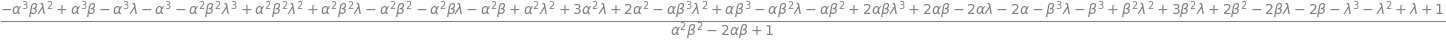

In [53]:
## determinant of M - lambda*I
cp

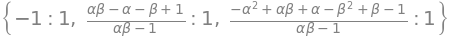

In [54]:
## Eigenvalues(:multiplicity) - suggests it's possible to have all negative eigenvalues and therefore be stable 
## if alpha >1 and beta < 1 (or vice versa) with alpha > 1/beta
eigs

In [56]:
####### Example for the 2-species equilibrium with alpha = 2, beta = 0.75 

Jtest = jacobian_fun((1-2)/(1-2*0.75),(1-0.75)/(1-2*0.75), 0, 2, 0.75)
M = sp.Matrix(Jtest)
cp = sp.det(Jtest - lam * sp.eye(3))
eigs = sp.roots(sp.Poly(cp, lam))

eigs

In [ ]:
####### SHADED REGION FOR EQUILIBRIUM POINTS ########

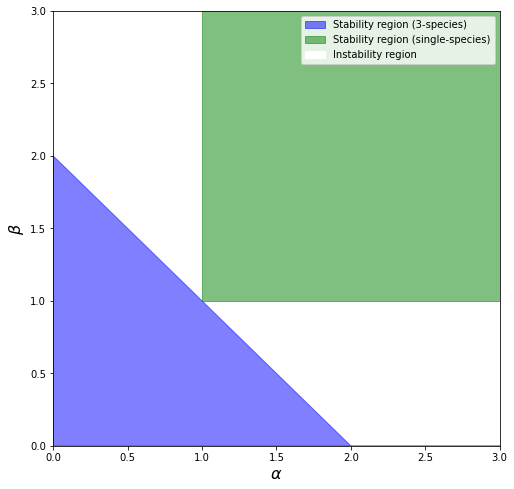

In [77]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

x = np.arange(0.0, 4, 0.01)
y1 = 2-x


fig, ax = plt.subplots(figsize=(8, 8))

ax.fill_between(x, 0, y1, color = 'blue', alpha = 0.5, label = 'Stability region (3-species)')
ax.fill_between(x+1, 1, 4, color = 'green', alpha = 0.5, label = 'Stability region (single-species)')

ax.set_ylabel(r'$\beta$', fontsize = 16)
ax.set_xlabel(r'$\alpha$', fontsize = 16)


# where some data has already been plotted to ax
handles, labels = ax.get_legend_handles_labels()

# manually define a new patch 
patch = mpatches.Patch(color='white', label='Instability region')

# handles is a list, so append manual patch
handles.append(patch) 

# plot the legend
plt.legend(handles=handles, loc='upper right')


plt.xlim([0, 3])
plt.ylim([0, 3])



plt.savefig('alphabetastabilityrange.pdf', dpi=400)
plt.show()